Importing some libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
df=pd.read_csv("spam.csv")

Viewing the entries

In [ ]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Viewing the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Decoding ham as 0 and spam as 1

In [ ]:
df.replace({"ham":0,"spam":1})

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Viewing the size

In [ ]:
df.shape

(5572, 2)

checking for NULL values

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Splitting data into two parts - Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df['Message'],df['Category'],test_size=0.2,random_state=42)

Converting all the text in training data into numeric data for our machine learning model by using count vectorizer method

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_num = cv.fit_transform(X_train.values)
X_train_num.shape

(4457, 7701)

Importing all the models and making a dictionary

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

mod={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Extra Trees':ExtraTreeClassifier(),
    'SVC':SVC(),
    'Multinomial Naive Bayes':MultinomialNB(),
    'K-Nearest Neighbours':KNeighborsClassifier()
}

Evaluating every model's accuracy

In [ ]:
X_test_num = cv.transform(X_test.values)
score=[]
for name,clas in mod.items():
  clas.fit(X_train_num,Y_train)
  sc=clas.score(X_test_num,Y_test)
  score.append(sc)
  print(f"{name} model has a score of {sc}")

Logistic Regression model has a score of 0.9865470852017937
Random Forest model has a score of 0.97847533632287
Decision Tree model has a score of 0.9739910313901345
Extra Trees model has a score of 0.9641255605381166
SVC model has a score of 0.9847533632286996
Multinomial Naive Bayes model has a score of 0.9919282511210762
K-Nearest Neighbours model has a score of 0.9264573991031391


Making a Bar plot for comparison of different models

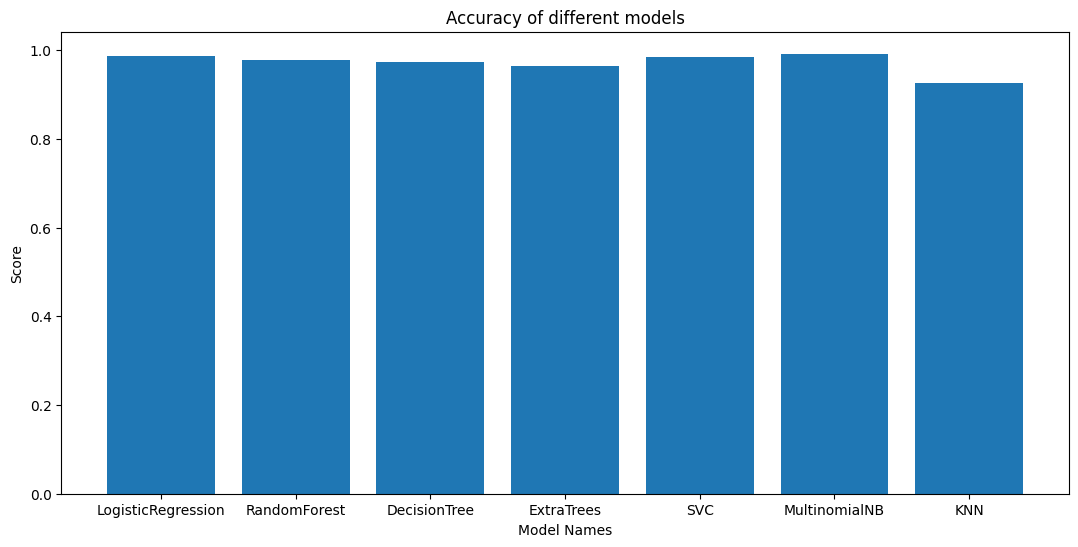

In [141]:
a=["LogisticRegression",'RandomForest', 'DecisionTree', 'ExtraTrees', 'SVC', 'MultinomialNB', 'KNN']
plt.figure(figsize=(13,6))
bar=plt.bar(a,score)

plt.xlabel('Model Names')
plt.ylabel('Score')
plt.title('Accuracy of different models')

plt.show()

Multimonial Naive Bayes model has the highest accuracy So I'll use it

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train_num,Y_train)

MultinomialNB()

Accuracy with training data - 99.33%
and with test data - 99.19%

In [ ]:
print(f"Score on Training set: {mnb.score(X_train_num,Y_train)}")
print(f"Score on Training set: {mnb.score(X_test_num,Y_test)}")

Score on Training set: 0.9932690150325331
Score on Training set: 0.9919282511210762


Making a function to check for ham or spam

In [ ]:
def checkspam(mail):
  mail_num=cv.transform(mail)
  res=mnb.predict(mail_num)
  return f"It's a {res[0]}"

In [137]:
check=checkspam(["Free entry in 2 a wkly comp to win FA Cup fina..."])
print(check)

It's a spam
